<h1><center>CREDIT EDA CASE STUDY</center></h1>

## STUDENTS:

### 1. ANUSHKUMAR
### 2. MITTHI JYOTI SHARMA

## PROBLEM STATEMENT :

### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## **Importing the required Libraries to work with numpy,pandas,matplotlib and seaborn :**

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the application_data dataset :

In [3]:
# Importing the application dataset
path=r'C:\Users\91865\Downloads\Data Science\Case study\application_data.csv'
df=pd.read_csv(path)

## Basic checks for a dataset :

In [4]:
# Checking the head of the dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Checking the tail of the dataset
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
# Checking the datatypes info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Checking the dataset for describe
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Subsetting the required meaningful columns from the application_data dataset for analysis:

In [9]:
# Subset of the entire dataset with the required columns for analysis
subsetdf=df.loc[:,['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL',
         'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
         'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_CONT_MOBILE',
         'FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
         'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','ORGANIZATION_TYPE','LANDAREA_AVG','APARTMENTS_MODE',
         'HOUSETYPE_MODE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
subsetdf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,LANDAREA_AVG,APARTMENTS_MODE,HOUSETYPE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,Business Entity Type 3,0.0369,0.0252,block of flats,-1134.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,School,0.0130,0.0924,block of flats,-828.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,Government,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,Business Entity Type 3,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,Religion,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Info of the subset
subsetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
DAYS_ID_PUBLISH         

## DATA CLEANING FOR NaN VALUES AND NULL VALUES :

#### Normally in a dataset if we have NaN values and NA values then as part of clean up activity we impute the frequent values of the column wherever we find or we remove the column/row if the percentage of null or NA values is very high for a column.

#### Here I have imputed the frequent value in my dataset where i have found no values and removed the rows with XNA values which does not give any meaning.

In [11]:
#Checking for the null values and NAN values in my subset
missing_values_percent_df=subsetdf.isnull().sum()*100/len(subsetdf)
missing_values_percent_sorted_df=pd.DataFrame({'column_name':subsetdf.columns,
                                               'missing_values_percent_df':missing_values_percent_df})
missing_values_percent_sorted_df.sort_values('missing_values_percent_df', inplace=True,ascending=False)
missing_values_percent_sorted_df

,column_name,missing_values_percent_df
LANDAREA_AVG,LANDAREA_AVG,59.376738
APARTMENTS_MODE,APARTMENTS_MODE,50.749729
HOUSETYPE_MODE,HOUSETYPE_MODE,50.176091
OCCUPATION_TYPE,OCCUPATION_TYPE,31.345545
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_GOODS_PRICE,AMT_GOODS_PRICE,0.090403


In [12]:
# Imputing the Frequent values and removing rows which have XNA values in the columns

subsetdf=subsetdf.apply(lambda x:x.fillna(x.value_counts().index[0]))
subsetdf.head()
missing_values_percent_df=subsetdf.isnull().sum()*100/len(subsetdf)
missing_values_percent_sorted_df=pd.DataFrame({'column_name':subsetdf.columns,
                                               'missing_values_percent_df':missing_values_percent_df})
missing_values_percent_sorted_df.sort_values('missing_values_percent_df', inplace=True,ascending=False)
missing_values_percent_sorted_df

,column_name,missing_values_percent_df
SK_ID_CURR,SK_ID_CURR,0.0
TARGET,TARGET,0.0
OCCUPATION_TYPE,OCCUPATION_TYPE,0.0
CNT_FAM_MEMBERS,CNT_FAM_MEMBERS,0.0
REGION_RATING_CLIENT,REGION_RATING_CLIENT,0.0
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,0.0
REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_LIVE_REGION,0.0
REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.0
ORGANIZATION_TYPE,ORGANIZATION_TYPE,0.0
LANDAREA_AVG,LANDAREA_AVG,0.0


In [13]:
#Dropping rows which have XNA as the values in the dataset
subsetdf=subsetdf[~subsetdf.ORGANIZATION_TYPE.str.contains("XNA")]
subsetdf=subsetdf[~subsetdf.CODE_GENDER.str.contains("XNA")]
subsetdf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,LANDAREA_AVG,APARTMENTS_MODE,HOUSETYPE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,Business Entity Type 3,0.0369,0.0252,block of flats,-1134.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,School,0.0130,0.0924,block of flats,-828.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,Government,0.0000,0.0840,block of flats,-815.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,Business Entity Type 3,0.0000,0.0840,block of flats,-617.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,Religion,0.0000,0.0840,block of flats,-1106.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,...,Other,0.0000,0.0840,block of flats,-2536.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,171000.0,1560726.0,41301.0,1395000.0,...,Business Entity Type 3,0.0000,0.0840,block of flats,-1562.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,360000.0,1530000.0,42075.0,1530000.0,...,Other,0.0000,0.0840,block of flats,-1070.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,135000.0,405000.0,20250.0,405000.0,...,Electricity,0.0000,0.0840,block of flats,-1673.0,0.0,0.0,0.0,0.0,0.0
10,100014,0,Cash loans,F,N,Y,112500.0,652500.0,21177.0,652500.0,...,Medicine,0.0000,0.0840,block of flats,-844.0,0.0,0.0,1.0,0.0,0.0


### DATATYPE CONVERSION IN THE DATAFRAME :

#### Converting the "CNT_FAM_MEMBERS" which is Float type that does not give senseas it can only be an integer. Hence performing the conversion for the same.

In [14]:
#Checking for the datatype of the columns
subsetdf['CNT_FAM_MEMBERS']=subsetdf['CNT_FAM_MEMBERS'].astype(int)
subsetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252133 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     252133 non-null int64
TARGET                         252133 non-null int64
NAME_CONTRACT_TYPE             252133 non-null object
CODE_GENDER                    252133 non-null object
FLAG_OWN_CAR                   252133 non-null object
FLAG_OWN_REALTY                252133 non-null object
AMT_INCOME_TOTAL               252133 non-null float64
AMT_CREDIT                     252133 non-null float64
AMT_ANNUITY                    252133 non-null float64
AMT_GOODS_PRICE                252133 non-null float64
NAME_INCOME_TYPE               252133 non-null object
NAME_EDUCATION_TYPE            252133 non-null object
NAME_FAMILY_STATUS             252133 non-null object
REGION_POPULATION_RELATIVE     252133 non-null float64
DAYS_BIRTH                     252133 non-null int64
DAYS_EMPLOYED                  252133 non-null int64
DAYS_ID_PUBLISH         

## Checking for the outliers in the subset and treating them if the percentage of outliers is more in a column :

In [15]:
#Check for any outliers in the numerical columns
#outlier for AMT_CREDIT column
q1,q2=np.percentile(subsetdf['AMT_CREDIT'],25),np.percentile(subsetdf['AMT_CREDIT'],75)
iqr1=q2-q1
cut_off1=iqr1*1.5
lower_val1,upper_val1=q1-cut_off1,q2+cut_off1
outliers1=[x for x in subsetdf['AMT_CREDIT'] if x<lower_val1 or x>upper_val1]
print('outliers for AMT_CREDIT:%d' % len(outliers1))
#outlier for AMT_INCOME_TOTAL column
q3,q4=np.percentile(subsetdf['AMT_INCOME_TOTAL'],25),np.percentile(subsetdf['AMT_INCOME_TOTAL'],75)
iqr2=q4-q3
cut_off2=iqr2*1.5
lower_val2,upper_val2=q3-cut_off2,q4+cut_off2
outliers2=[x for x in subsetdf['AMT_INCOME_TOTAL'] if x<lower_val2 or x>upper_val2]
print('outliers for AMT_INCOME_TOTAL:%d' % len(outliers2))
#outlier for CNT_FAM_MEMBERS column
q5,q6=np.percentile(subsetdf['CNT_FAM_MEMBERS'],25),np.percentile(subsetdf['CNT_FAM_MEMBERS'],75)
iqr3=q6-q5
cut_off3=iqr3*1.5
lower_val3,upper_val3=q5-cut_off3,q6+cut_off3
outliers3=[x for x in subsetdf['CNT_FAM_MEMBERS'] if x<lower_val3 or x>upper_val3]
print('outliers for CNT_FAM_MEMBERS:%d' % len(outliers3))

outliers for AMT_CREDIT:5426
outliers for AMT_INCOME_TOTAL:8752
outliers for CNT_FAM_MEMBERS:3929


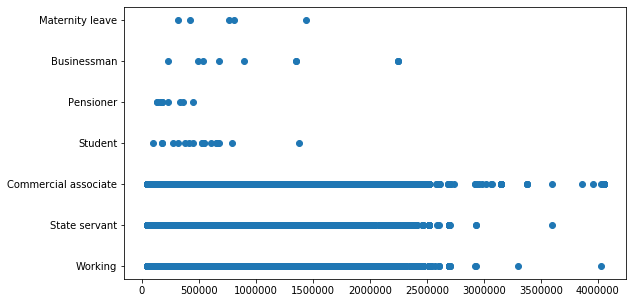

In [16]:
# Plotting subset of numerical variables for outliers
plt.rcParams["figure.figsize"]=[9,5]
plt.scatter(subsetdf['AMT_CREDIT'],subsetdf['NAME_INCOME_TYPE'])
plt.show()

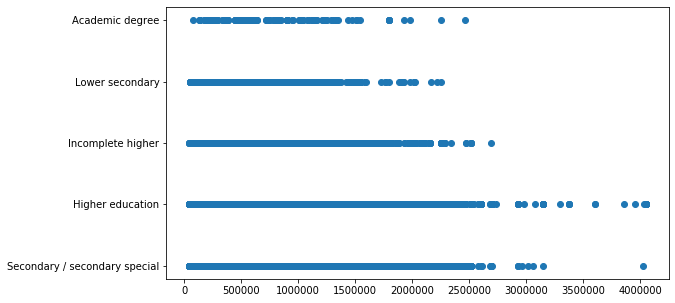

In [17]:
plt.rcParams["figure.figsize"]=[9,5]
plt.scatter(subsetdf['AMT_CREDIT'],subsetdf['NAME_EDUCATION_TYPE'])
plt.show()

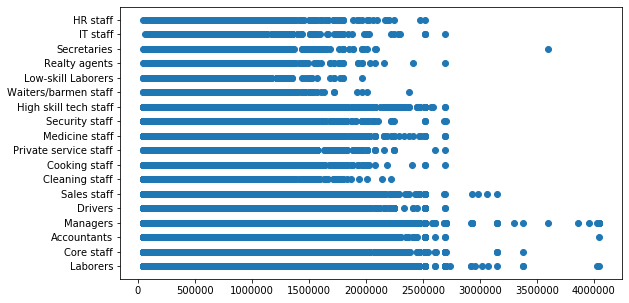

In [18]:
plt.rcParams["figure.figsize"]=[9,5]
plt.scatter(subsetdf['AMT_CREDIT'],subsetdf['OCCUPATION_TYPE'])
plt.show()

In [20]:
#Data imbalance 

freq = subsetdf['TARGET'].value_counts()
print (freq)

0    230298
1     21835
Name: TARGET, dtype: int64


## Splitting the subset to 2 different datasets based on the "TARGET" column :

In [21]:
#Splitting the dataframe to Target0(noproblems) frames

subsetdf_notdefaulters=subsetdf[subsetdf['TARGET']==0]
subsetdf_notdefaulters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230298 entries, 1 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     230298 non-null int64
TARGET                         230298 non-null int64
NAME_CONTRACT_TYPE             230298 non-null object
CODE_GENDER                    230298 non-null object
FLAG_OWN_CAR                   230298 non-null object
FLAG_OWN_REALTY                230298 non-null object
AMT_INCOME_TOTAL               230298 non-null float64
AMT_CREDIT                     230298 non-null float64
AMT_ANNUITY                    230298 non-null float64
AMT_GOODS_PRICE                230298 non-null float64
NAME_INCOME_TYPE               230298 non-null object
NAME_EDUCATION_TYPE            230298 non-null object
NAME_FAMILY_STATUS             230298 non-null object
REGION_POPULATION_RELATIVE     230298 non-null float64
DAYS_BIRTH                     230298 non-null int64
DAYS_EMPLOYED                  230298 non-null int64
DAYS_ID_PUBLISH         

In [23]:
#Splitting the dataframe to Target1(haveproblems) frames

subsetdf_defaulters=subsetdf[subsetdf['TARGET']==1]
subsetdf_defaulters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 307509
Data columns (total 36 columns):
SK_ID_CURR                     21835 non-null int64
TARGET                         21835 non-null int64
NAME_CONTRACT_TYPE             21835 non-null object
CODE_GENDER                    21835 non-null object
FLAG_OWN_CAR                   21835 non-null object
FLAG_OWN_REALTY                21835 non-null object
AMT_INCOME_TOTAL               21835 non-null float64
AMT_CREDIT                     21835 non-null float64
AMT_ANNUITY                    21835 non-null float64
AMT_GOODS_PRICE                21835 non-null float64
NAME_INCOME_TYPE               21835 non-null object
NAME_EDUCATION_TYPE            21835 non-null object
NAME_FAMILY_STATUS             21835 non-null object
REGION_POPULATION_RELATIVE     21835 non-null float64
DAYS_BIRTH                     21835 non-null int64
DAYS_EMPLOYED                  21835 non-null int64
DAYS_ID_PUBLISH                21835 non-

   ## Analysis for TARGET=1(Defaulters) dataset :
   
   #### Plotting the categorical variables against the Target value for univariate analysis :

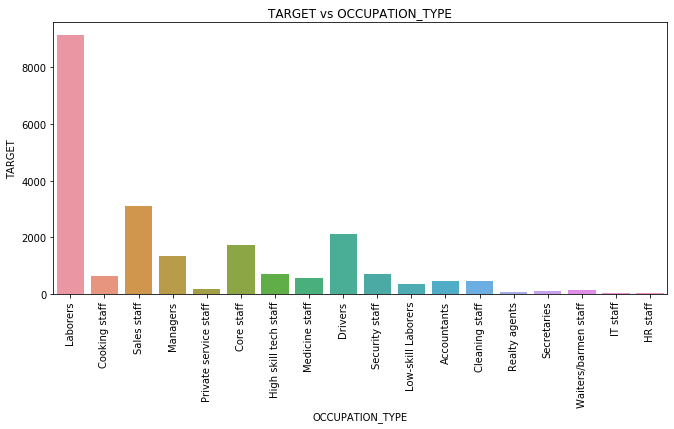

In [24]:
#Analysis for Target=1
#UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES WITH RESPECT TO TARGET:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='OCCUPATION_TYPE', data=subsetdf_defaulters)
plt.title('TARGET vs OCCUPATION_TYPE')
plt.ylabel('TARGET')
plt.xlabel('OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.show()

### INFERENCE :

#### From the above chart we can infer that the maximum customers with expected loan defaulters with Target value 1 comes under the occupation_type of "Labourers".

### Occupation_type of the customers who are expected to default (From Max to Min):

#### 1. Labourers
#### 2. Sales staff
#### 3. Drivers
#### 4. Core staff
#### 5. Managers

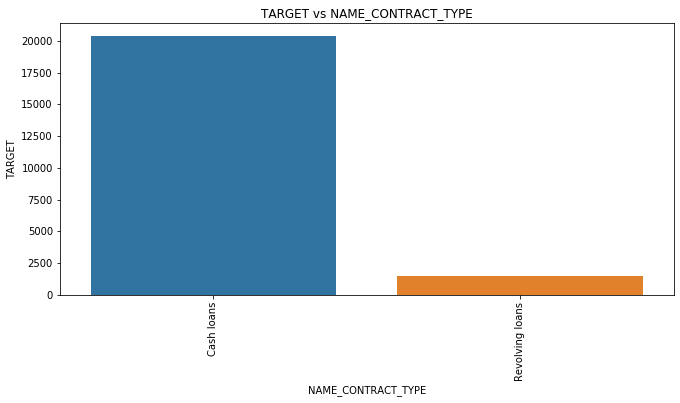

In [25]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_CONTRACT_TYPE', data=subsetdf_defaulters)
plt.title('TARGET vs NAME_CONTRACT_TYPE')
plt.ylabel('TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :

#### The type of loans which has maximum defaulters is : Cash loans

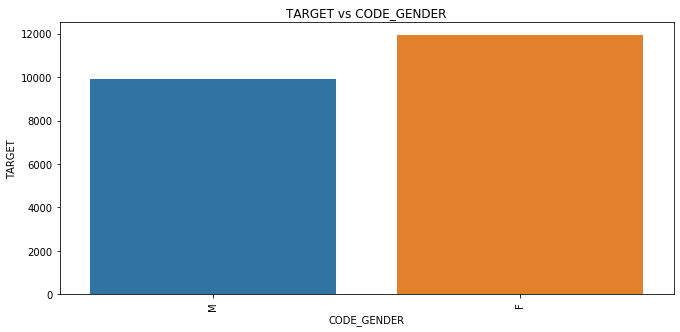

In [31]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='CODE_GENDER', data=subsetdf_defaulters)
plt.title('TARGET vs CODE_GENDER')
plt.ylabel('TARGET')
plt.xlabel('CODE_GENDER')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### The higher loan defaulters are: Females

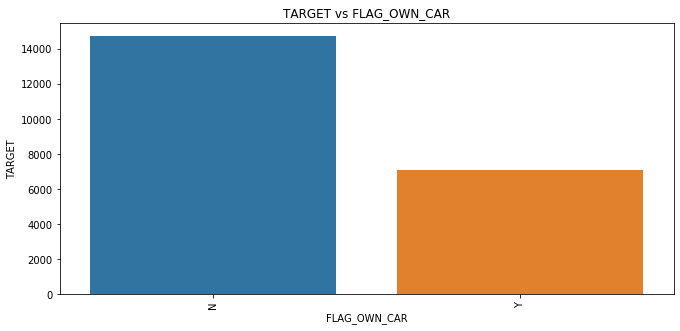

In [32]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='FLAG_OWN_CAR', data=subsetdf_defaulters)
plt.title('TARGET vs FLAG_OWN_CAR')
plt.ylabel('TARGET')
plt.xlabel('FLAG_OWN_CAR')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### From the above chart we can infer that the customers who do not have a car tend to be defaulters than those who own a car.

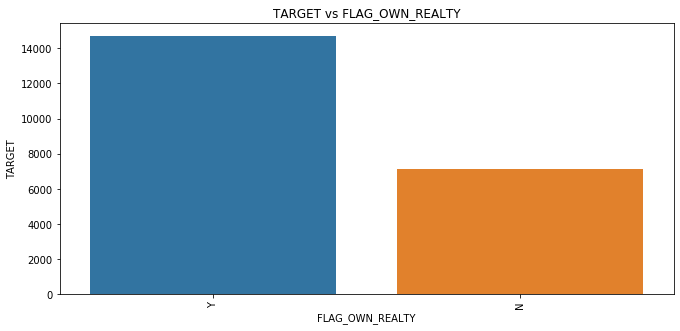

In [28]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='FLAG_OWN_REALTY', data=subsetdf_defaulters)
plt.title('TARGET vs FLAG_OWN_REALTY')
plt.ylabel('TARGET')
plt.xlabel('FLAG_OWN_REALTY')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### We can observe that from tha above chart that the customer with the own house tend to take more loans and result as defaulters.

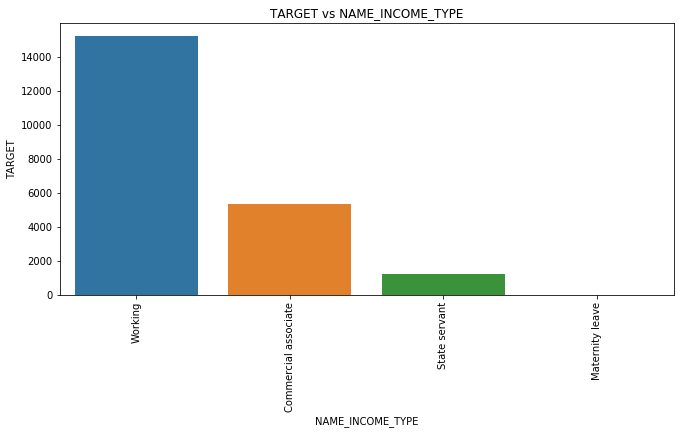

In [29]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_INCOME_TYPE', data=subsetdf_defaulters)
plt.title('TARGET vs NAME_INCOME_TYPE')
plt.ylabel('TARGET')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :

#### From the above scenario we could observe that the defaulters are maxmum among the working customers and only customers who are working go for a loan mostly.

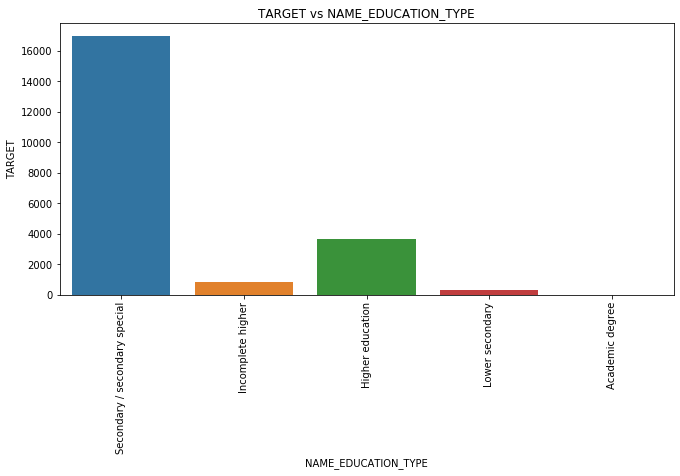

In [30]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_EDUCATION_TYPE', data=subsetdf_defaulters)
plt.title('TARGET vs NAME_EDUCATION_TYPE')
plt.ylabel('TARGET')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :

#### The defaulters mostly belong to those who have education levels of _secondary/secondary special._

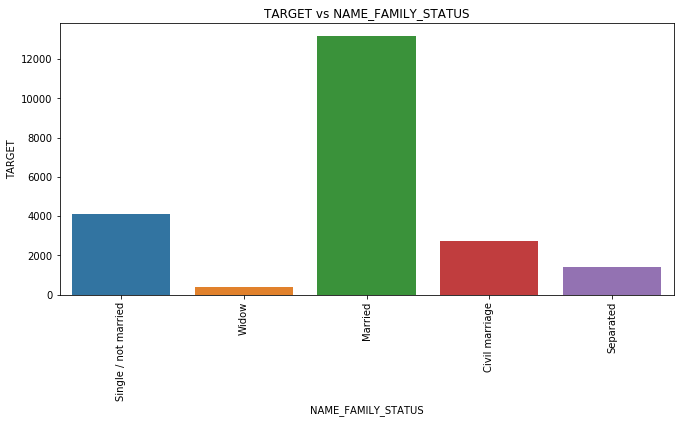

In [26]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_FAMILY_STATUS', data=subsetdf_defaulters)
plt.title('TARGET vs NAME_FAMILY_STATUS')
plt.ylabel('TARGET')
plt.xlabel('NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :

#### The loan defaulters are maximum if they are _married._

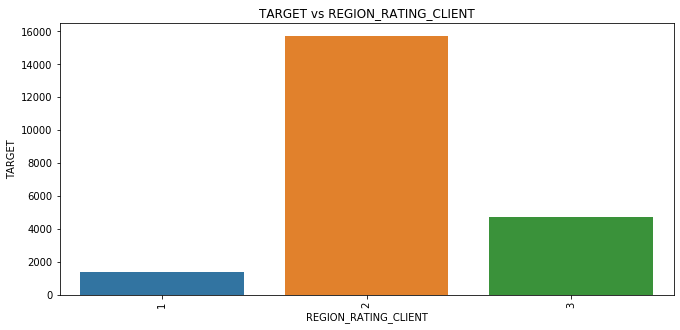

In [27]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='REGION_RATING_CLIENT', data=subsetdf_defaulters)
plt.title('TARGET vs REGION_RATING_CLIENT')
plt.ylabel('TARGET')
plt.xlabel('REGION_RATING_CLIENT')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :

#### The loan defaulters are living in the Region_Rating_Client rating of _2._

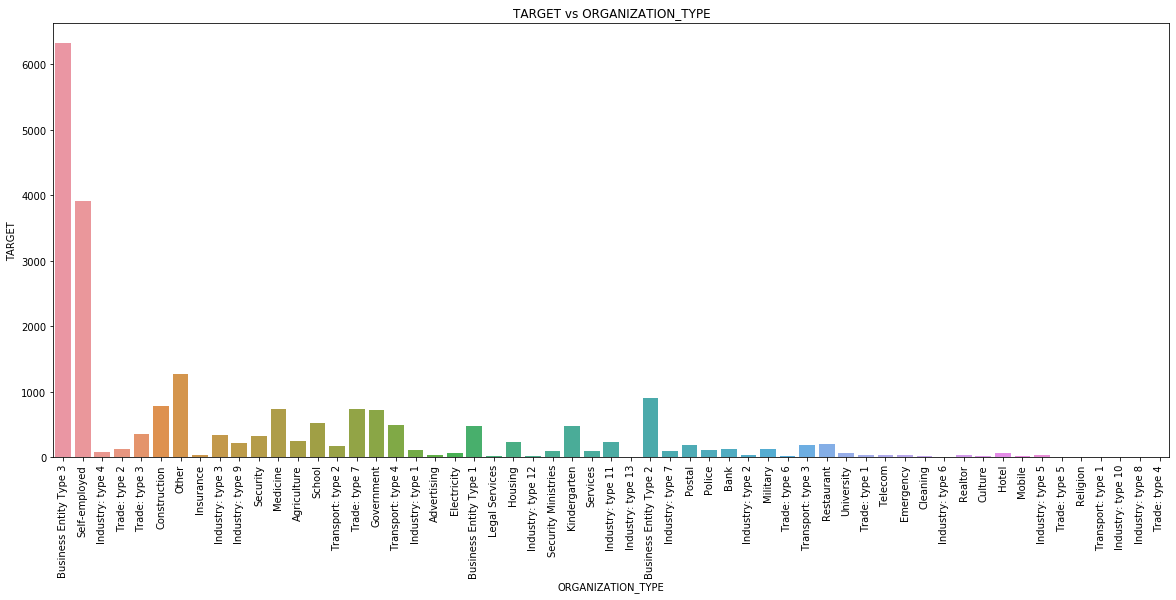

In [28]:
plt.rcParams["figure.figsize"]=[20,8]
sns.countplot(x='ORGANIZATION_TYPE', data=subsetdf_defaulters)
plt.title('TARGET vs ORGANIZATION_TYPE')
plt.ylabel('TARGET')
plt.xlabel('ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :

#### The loan defaulters are almost maximum from only 2 organization type

#### 1. Business Entity Type3
#### 2. Self-Employed

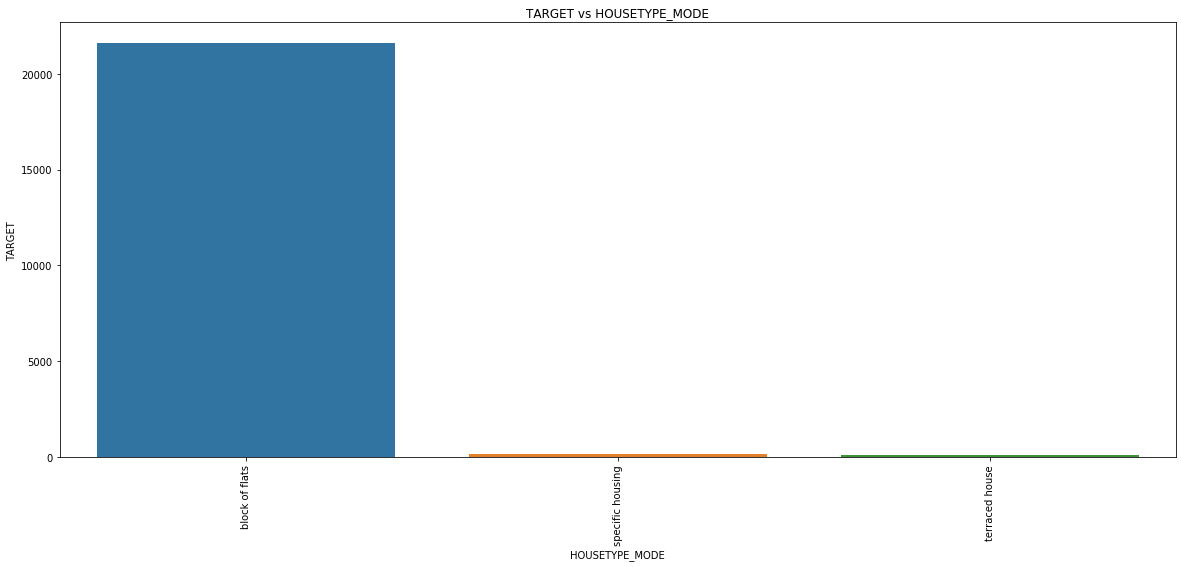

In [29]:
plt.rcParams["figure.figsize"]=[20,8]
sns.countplot(x='HOUSETYPE_MODE', data=subsetdf_defaulters)
plt.title('TARGET vs HOUSETYPE_MODE')
plt.ylabel('TARGET')
plt.xlabel('HOUSETYPE_MODE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE : 
#### From the above, we can infer that the loan defaulters are those who live in block of flats.

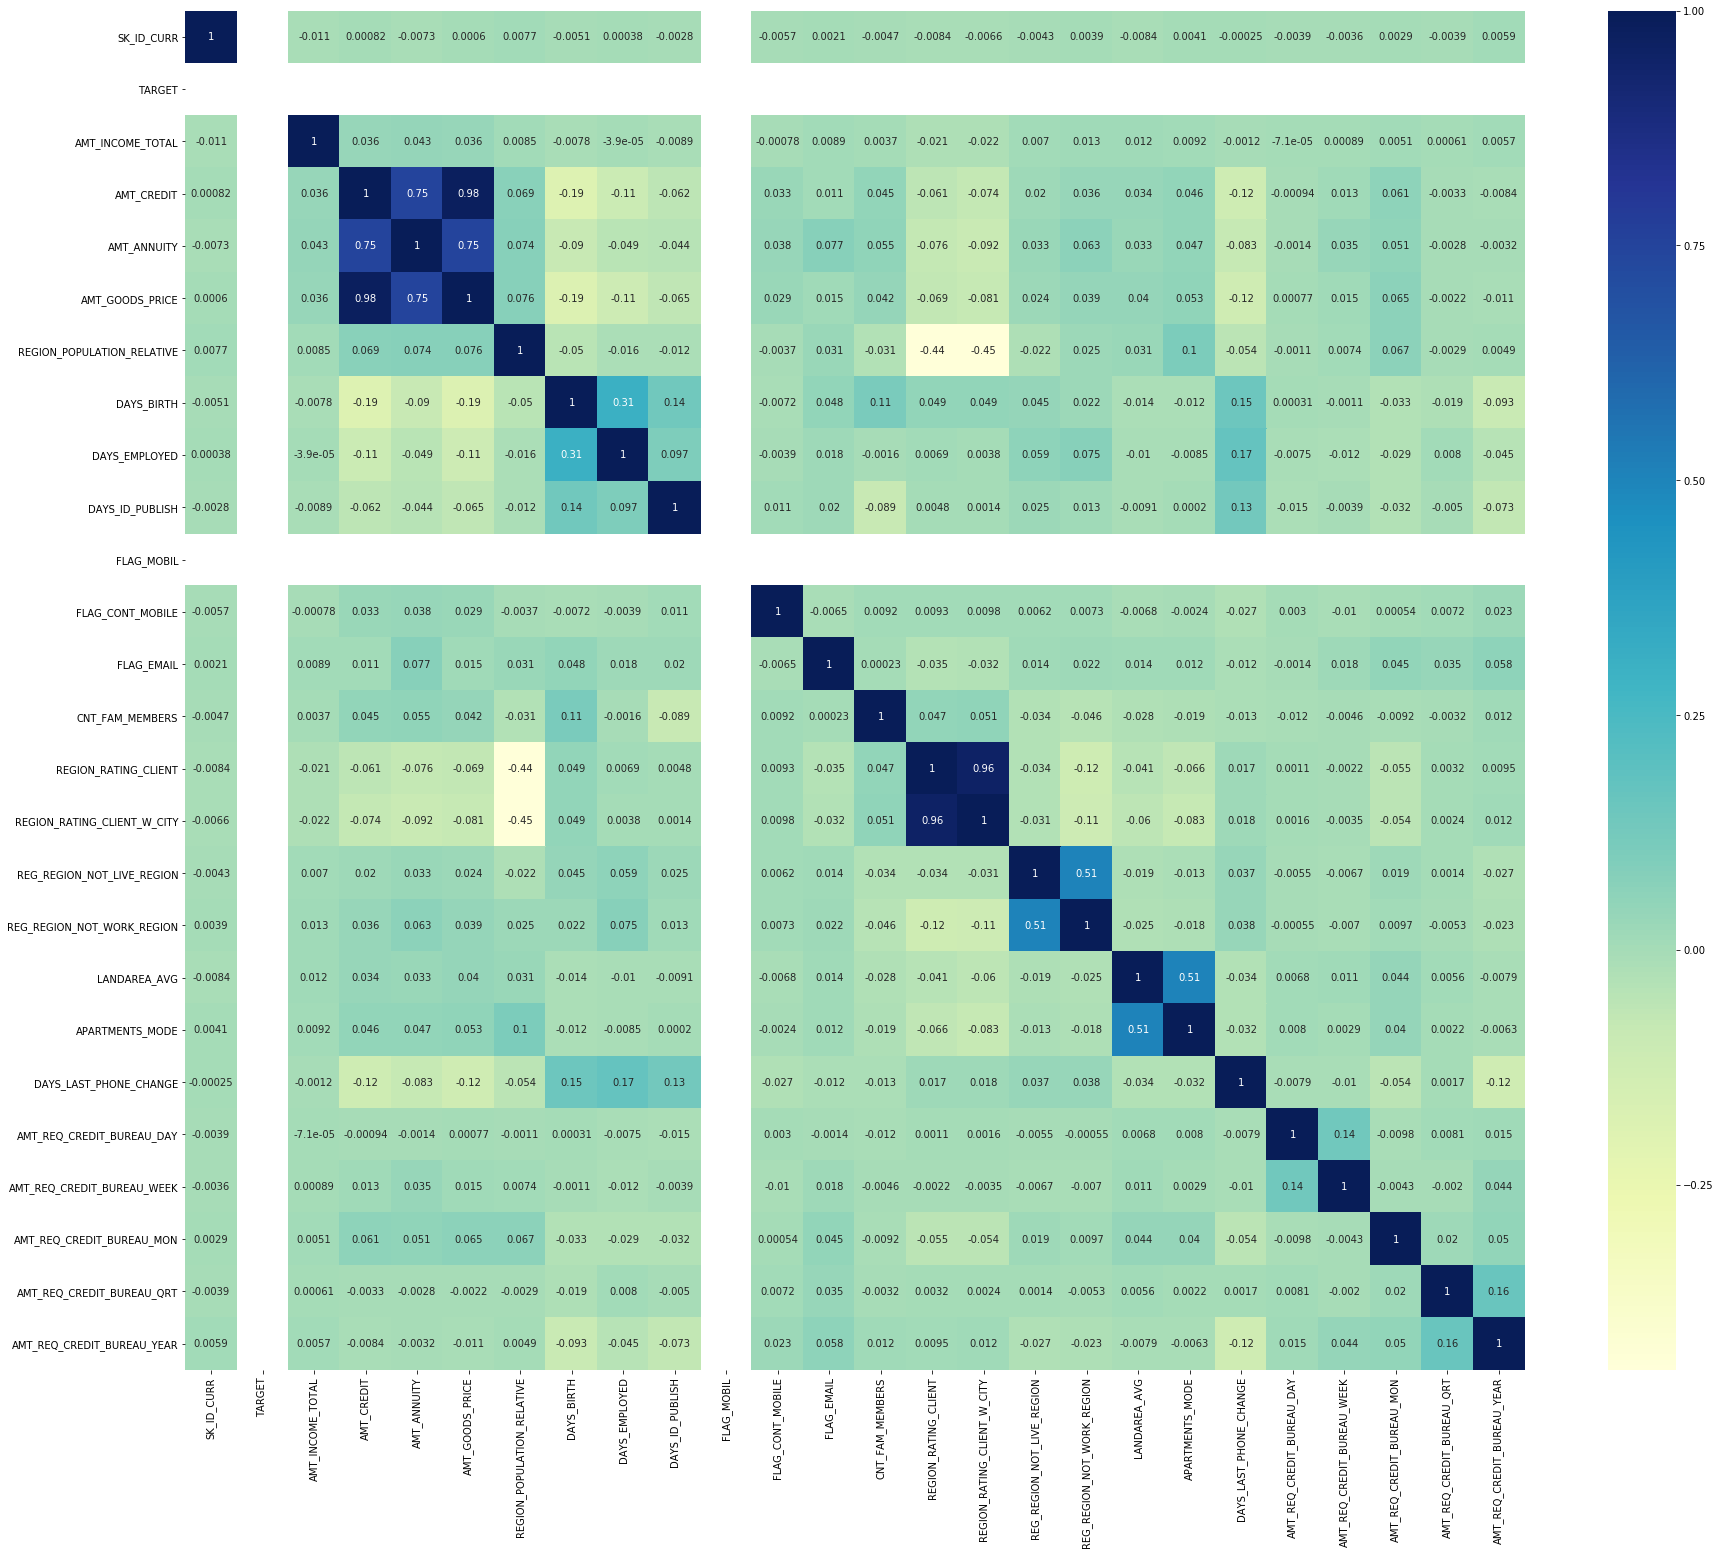

In [30]:
#Correlation
plt.rcParams["figure.figsize"]=[30,25]
sns.heatmap(subsetdf_defaulters.corr(),cmap="YlGnBu", annot=True)
plt.show()

## INFERENCE :
#### The correlation is high between the numerical columns such as 
#### 1.AMT_CREDIT
#### 2.AMT_ANNUITY 
#### 3.AMT_GOODS_PRICE
#### 4.DAYS_EMPLOYED
#### 5.REGION_RATING_CLIENT
#### 6.REGION_RATING_CLIENT_W_CITY

## Analysis for TARGET=0(Not Defaulters) dataset :
   
   #### Plotting the categorical variables against the Target value for univariate analysis :

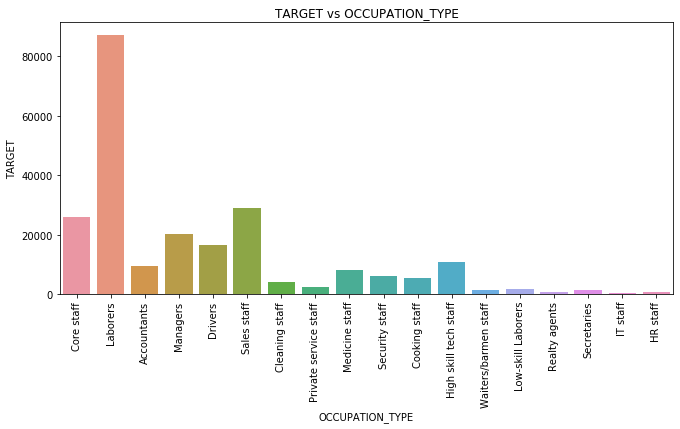

In [31]:
#Analysis for Target=0
#UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES WITH RESPECT TO TARGET:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='OCCUPATION_TYPE', data=subsetdf_notdefaulters)
plt.title('TARGET vs OCCUPATION_TYPE')
plt.ylabel('TARGET')
plt.xlabel('OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### From the above we could see that the customers whose occupation is _Labourers and Sales staff_ repay their loan successfully.

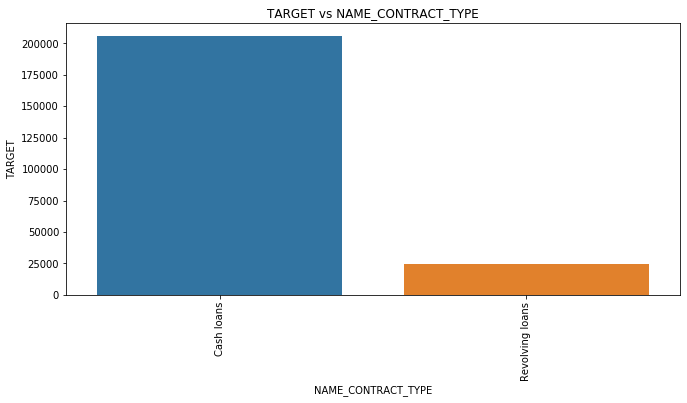

In [32]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_CONTRACT_TYPE', data=subsetdf_notdefaulters)
plt.title('TARGET vs NAME_CONTRACT_TYPE')
plt.ylabel('TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### The _cash loans_ are being repayed successfully than the revolving loans.

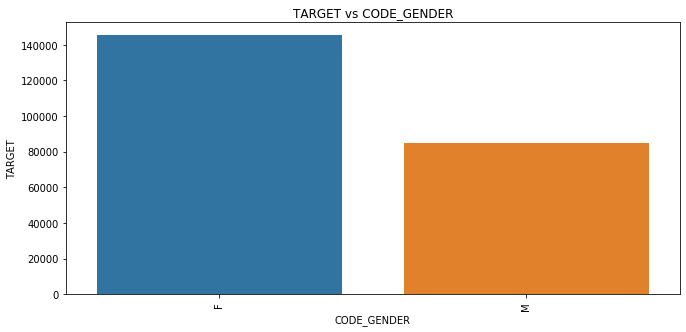

In [33]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='CODE_GENDER', data=subsetdf_notdefaulters)
plt.title('TARGET vs CODE_GENDER')
plt.ylabel('TARGET')
plt.xlabel('CODE_GENDER')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### We could observe that _Female customers_ repay their loans than the male customers.

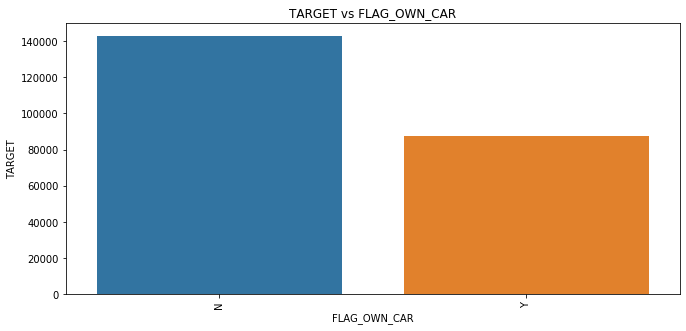

In [34]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='FLAG_OWN_CAR', data=subsetdf_notdefaulters)
plt.title('TARGET vs FLAG_OWN_CAR')
plt.ylabel('TARGET')
plt.xlabel('FLAG_OWN_CAR')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### We can observe from the above that customers who _don't own a car_ repay theor loans.

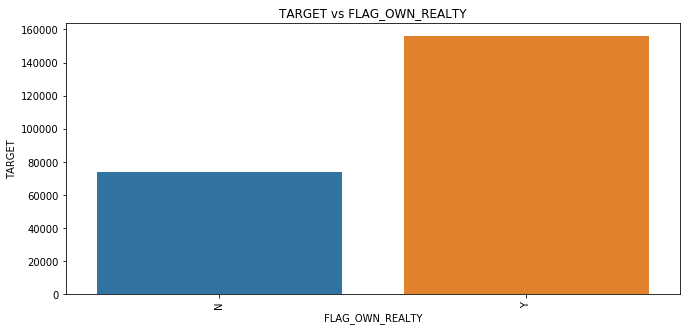

In [35]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='FLAG_OWN_REALTY', data=subsetdf_notdefaulters)
plt.title('TARGET vs FLAG_OWN_REALTY')
plt.ylabel('TARGET')
plt.xlabel('FLAG_OWN_REALTY')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### Customers _who own a house_ tend to repay the loans at the stipulated times.

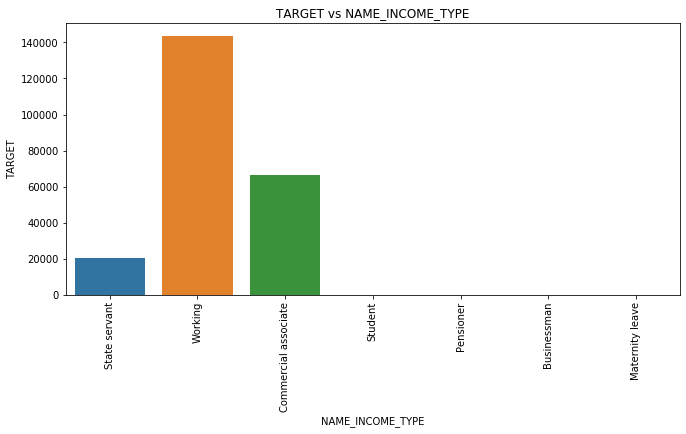

In [36]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_INCOME_TYPE', data=subsetdf_notdefaulters)
plt.title('TARGET vs NAME_INCOME_TYPE')
plt.ylabel('TARGET')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### Most _working customers_ tend to repay their loans at the correct time than non-working and other categories.

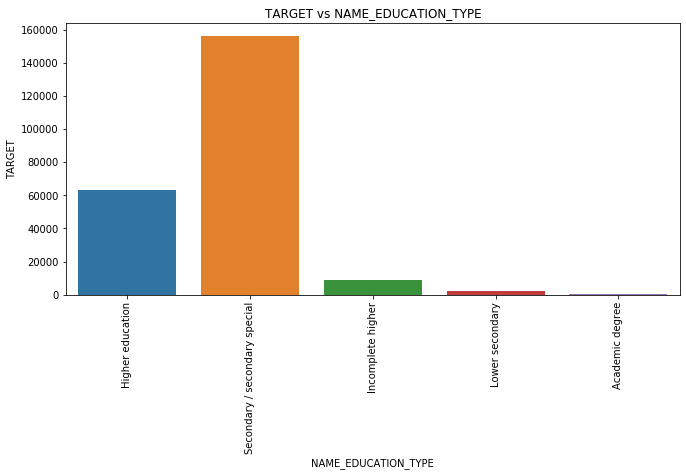

In [37]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_EDUCATION_TYPE', data=subsetdf_notdefaulters)
plt.title('TARGET vs NAME_EDUCATION_TYPE')
plt.ylabel('TARGET')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### Similar inference can be noted where customers who have education levels of _secondary/secondary special_ repay their loan successfully.

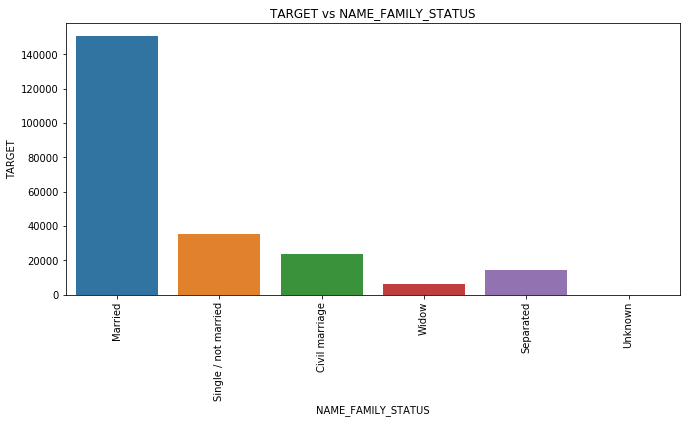

In [38]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='NAME_FAMILY_STATUS', data=subsetdf_notdefaulters)
plt.title('TARGET vs NAME_FAMILY_STATUS')
plt.ylabel('TARGET')
plt.xlabel('NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### Those customers whose family status is _married_ repay their loans correctly.

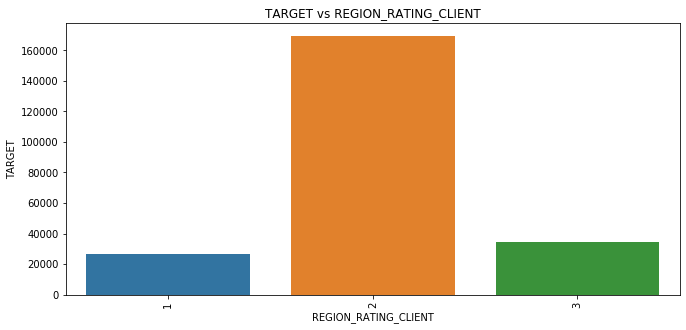

In [39]:
plt.rcParams["figure.figsize"]=[11,5]
sns.countplot(x='REGION_RATING_CLIENT', data=subsetdf_notdefaulters)
plt.title('TARGET vs REGION_RATING_CLIENT')
plt.ylabel('TARGET')
plt.xlabel('REGION_RATING_CLIENT')
plt.xticks(rotation=90)
plt.show()

## INFERENCE:
#### From the above chart we can identify that the customers living in the region_rating_client of _"2"_ repay their loans without difficulties

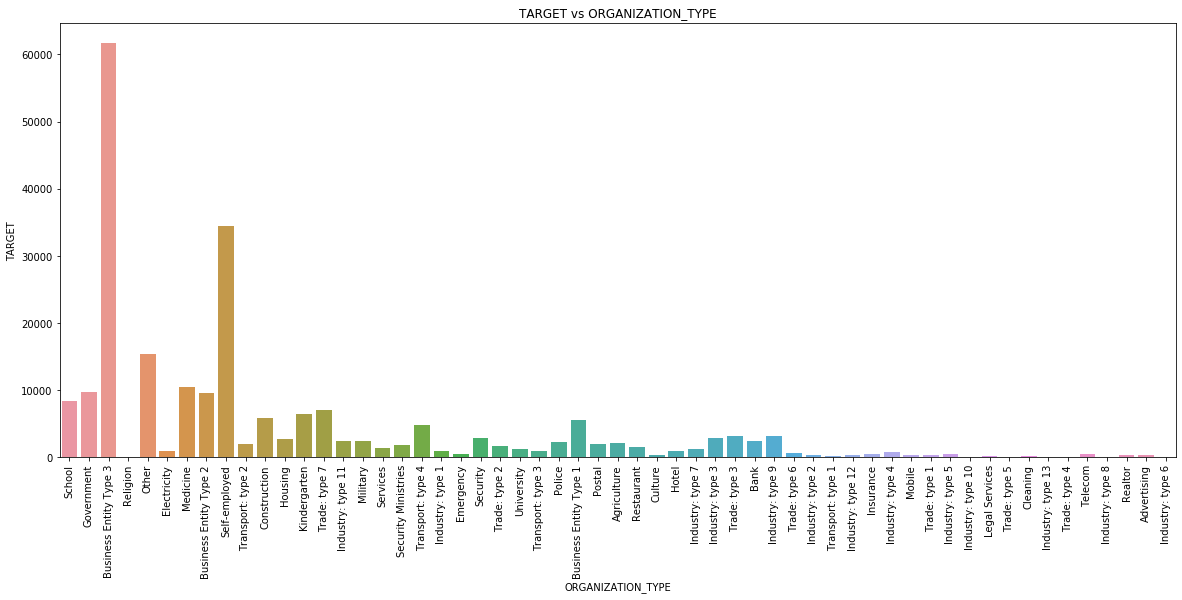

In [40]:
plt.rcParams["figure.figsize"]=[20,8]
sns.countplot(x='ORGANIZATION_TYPE', data=subsetdf_notdefaulters)
plt.title('TARGET vs ORGANIZATION_TYPE')
plt.ylabel('TARGET')
plt.xlabel('ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### From the above inference chart we could observe that customers if organization_type as _"Business_Entity_Type3" and "Self-Employed"_ tend to repay their loan without any difficultiies.

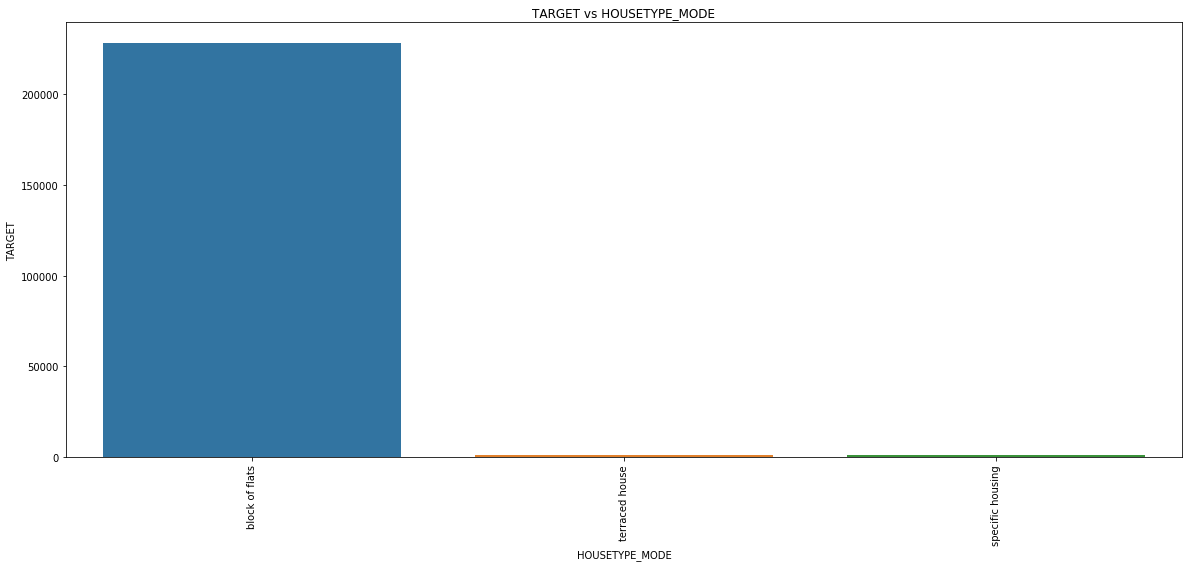

In [41]:
plt.rcParams["figure.figsize"]=[20,8]
sns.countplot(x='HOUSETYPE_MODE', data=subsetdf_notdefaulters)
plt.title('TARGET vs HOUSETYPE_MODE')
plt.ylabel('TARGET')
plt.xlabel('HOUSETYPE_MODE')
plt.xticks(rotation=90)
plt.show()

## INFERENCE:
#### From the above we can conclude that the customers who live in _block of flats_ do not face any difficulties in repaying the loans.

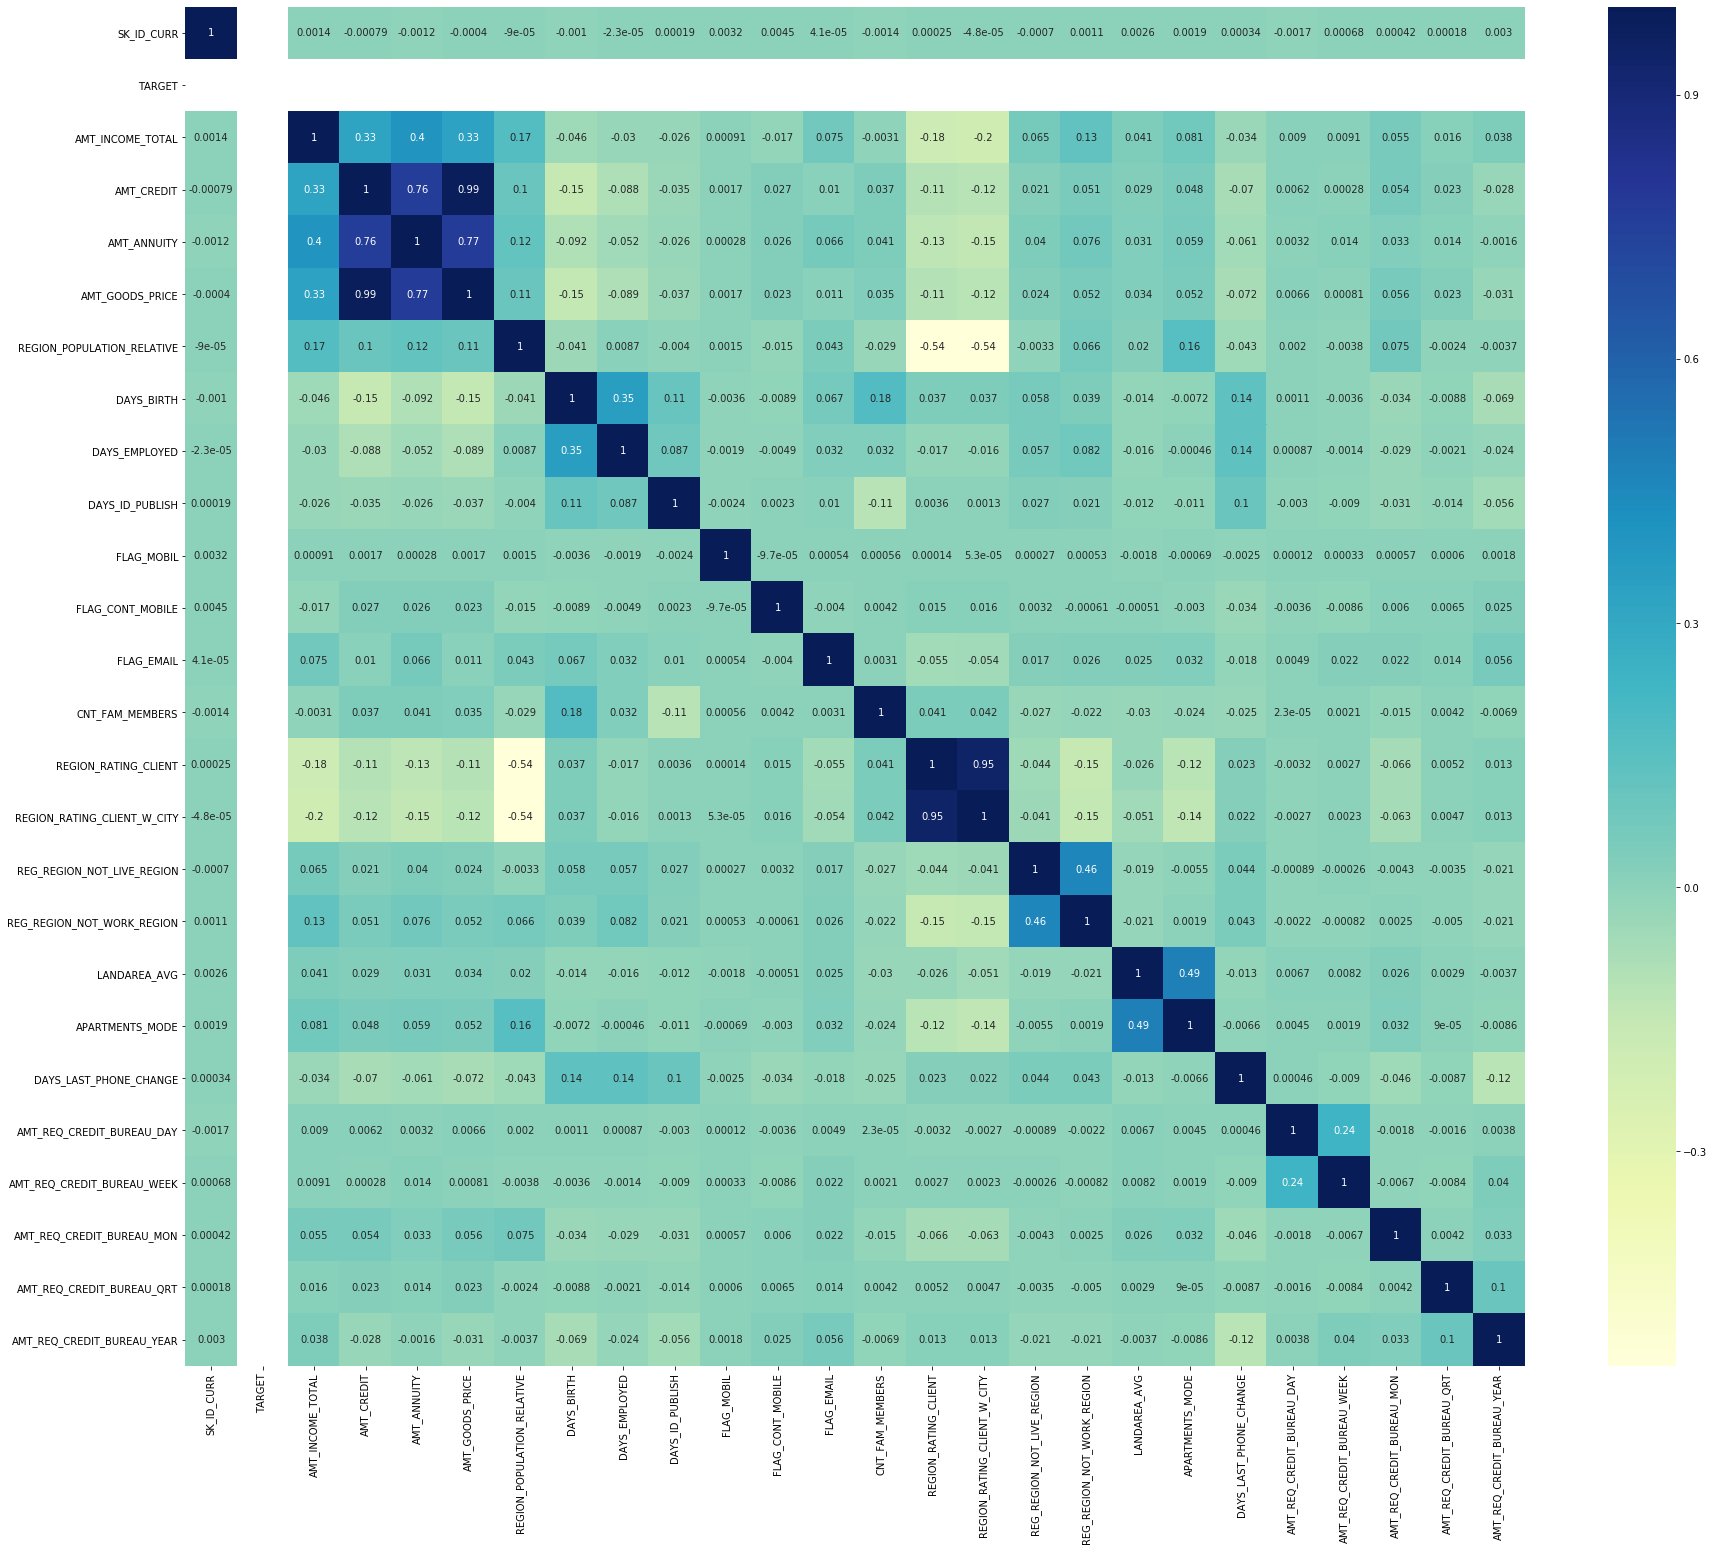

In [42]:
#Correlation
plt.rcParams["figure.figsize"]=[30,25]
sns.heatmap(subsetdf_notdefaulters.corr(),cmap="YlGnBu", annot=True)
plt.show()

## INFERENCE:
#### From both correlation maps we could find that the same values are highly correlated for both loan defaulters and non-defaulters.
#### The correlation is high between the numerical columns as follows, 
#### 1.AMT_CREDIT
#### 2.AMT_ANNUITY 
#### 3.AMT_GOODS_PRICE
#### 4.DAYS_EMPLOYED
#### 5.REGION_RATING_CLIENT
#### 6.REGION_RATING_CLIENT_W_CITY

# OVERALL ANALYSIS & INFERENCE FOR UNIVARIATE ANALYSIS FOR TARGET-1 AND TARGET-0 :

### All the comparisons and graphs show the below,

#### Defaulters and non-defaulters come under the same categories such as,
#### * Those who have an own house
#### * Those who have a own car
#### * Those who are Self-Employed and working

## There is a high correlation between the same columns in both defaulters and non-defaulters dataset and hence those columns are primarily correlated to 'Target' column that can give the result whether the customer will be able to repay the loan without difficulties or not.

## BIVARIATE ANALYSIS FOR TARGET-0 WHO ARE NOT DEFAULTERS :

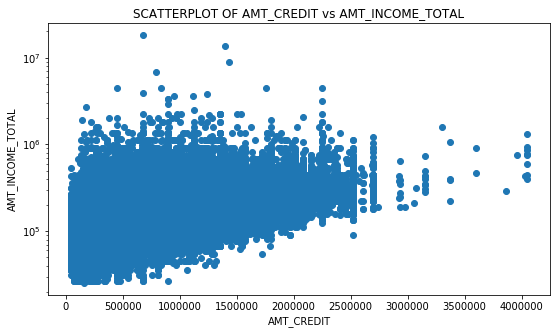

In [43]:
#BIVARIATE ANALYSIS
plt.rcParams["figure.figsize"]=[9,5]
plt.title("SCATTERPLOT OF AMT_CREDIT vs AMT_INCOME_TOTAL")
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.scatter(subsetdf_notdefaulters['AMT_CREDIT'],subsetdf_notdefaulters['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.show()

## INFERENCE :

#### From the above chart we could observe that the density of customers whose total income is from 1 Lakh to 1 Cr are those who repay their loan amounts regularly and it is safe to provide further funds and higher credit amount.

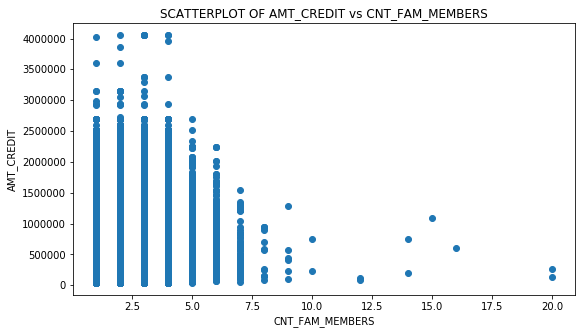

In [55]:
plt.rcParams["figure.figsize"]=[9,5]
plt.title("SCATTERPLOT OF AMT_CREDIT vs CNT_FAM_MEMBERS")
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('AMT_CREDIT')
plt.scatter(subsetdf_notdefaulters['CNT_FAM_MEMBERS'],subsetdf_notdefaulters['AMT_CREDIT'])
plt.show()

## INFERENCE :

####  we could observe that lesser the count of the members in the family higher they get the credit amount and banks can have a confidence that the customer will be able to repay his loan.

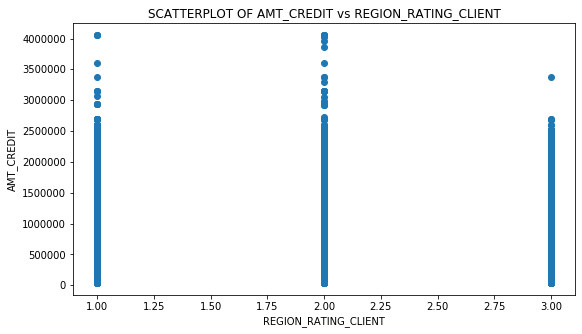

In [56]:
plt.rcParams["figure.figsize"]=[9,5]
plt.title("SCATTERPLOT OF AMT_CREDIT vs REGION_RATING_CLIENT")
plt.xlabel('REGION_RATING_CLIENT')
plt.ylabel('AMT_CREDIT')
plt.scatter(subsetdf_notdefaulters['REGION_RATING_CLIENT'],subsetdf_notdefaulters['AMT_CREDIT'])
plt.show()

## INFERENCE :

   ####  Here the loan amount credit tends to increase if the Region_Rating_Client is 1 or 2. When the customer comes from a region where usually people repay their loans, then it is a confidence of the company that a person from this region will be able to repay the loans.

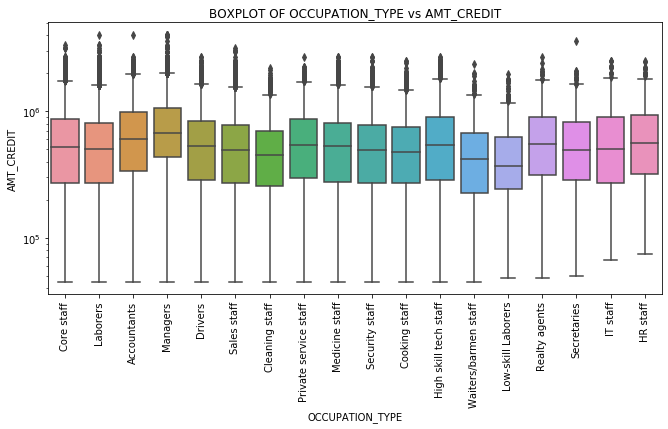

In [61]:
plt.rcParams["figure.figsize"]=[11,5]
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=subsetdf_notdefaulters)
plt.title("BOXPLOT OF OCCUPATION_TYPE vs AMT_CREDIT")
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### Reality Agents,Managers,High skilled Labourers are the customers who get higher credit amounts and pay their loans on time without defaults.

## BIVARIATE ANALYSIS FOR TARGET-1 WHO ARE EXPECTED DEFAULTERS :

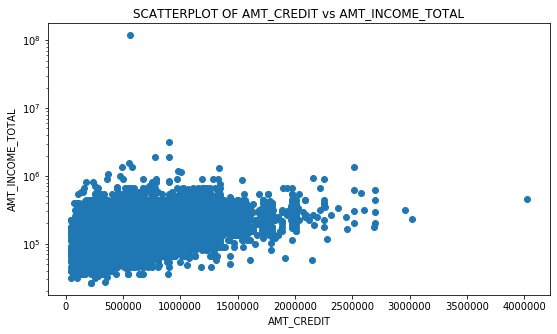

In [57]:
plt.rcParams["figure.figsize"]=[9,5]
plt.title("SCATTERPLOT OF AMT_CREDIT vs AMT_INCOME_TOTAL")
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.scatter(subsetdf_defaulters['AMT_CREDIT'],subsetdf_defaulters['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.show()

## INFERENCE :
#### From the scatterplot we can observe that the credit amount is dense for the customers with Income total of 1 Lakh and 1 Cr. This is a high positive correlated chart which also confirms that the correlation is high between AMT_INCOME_TOTAL and AMT_CREDIT.

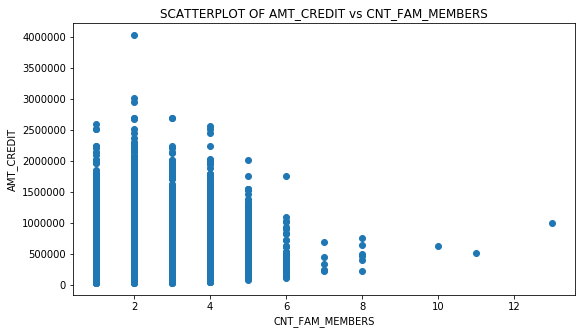

In [58]:
plt.rcParams["figure.figsize"]=[9,5]
plt.title("SCATTERPLOT OF AMT_CREDIT vs CNT_FAM_MEMBERS")
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('AMT_CREDIT')
plt.scatter(subsetdf_defaulters['CNT_FAM_MEMBERS'],subsetdf_defaulters['AMT_CREDIT'])
plt.show()

## INFERENCE:
#### From the above we could see that the customers who face difficulties to repay the loan are having a count of family memebers are from 1 to 6 and they get a higher credit amount as loan.

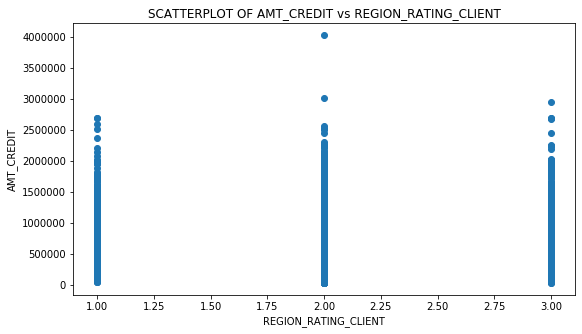

In [59]:
plt.rcParams["figure.figsize"]=[9,5]
plt.title("SCATTERPLOT OF AMT_CREDIT vs REGION_RATING_CLIENT")
plt.xlabel('REGION_RATING_CLIENT')
plt.ylabel('AMT_CREDIT')
plt.scatter(subsetdf_defaulters['REGION_RATING_CLIENT'],subsetdf_defaulters['AMT_CREDIT'])
plt.show()

## INFERENCE :
#### As you can see that the customers who live in the region client rating of 1 and 2 get highrt amount credited for loans and have difficulties in repaying the loan.

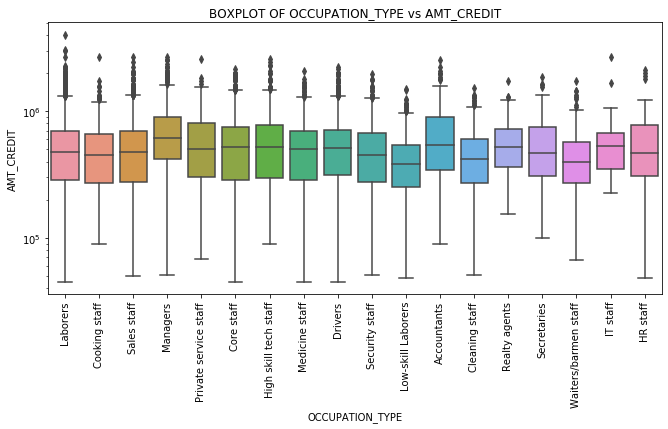

In [60]:
plt.rcParams["figure.figsize"]=[11,5]
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=subsetdf_defaulters)
plt.title("BOXPLOT OF OCCUPATION_TYPE vs AMT_CREDIT")
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

## INFERENCE :
#### As per the above box plot, Accountants and Managers get higher credit amount and have difficulties in repaying the loans.

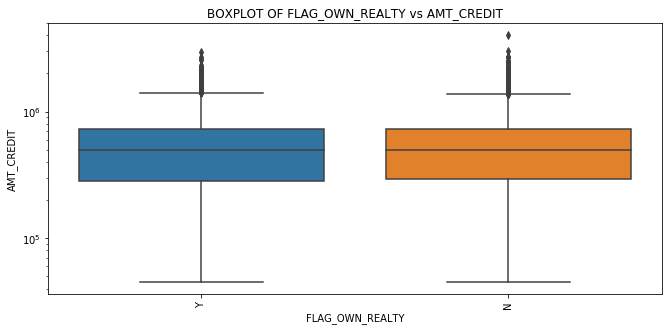

In [62]:
plt.rcParams["figure.figsize"]=[11,5]
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_CREDIT',data=subsetdf_defaulters)
plt.title("BOXPLOT OF FLAG_OWN_REALTY vs AMT_CREDIT")
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

## INFERENCE:
#### There is no effect on the credit amount of loans even if the customer has or does not have own house. Both get almost the same credit amount for the loans.